In [5]:
import pandas as pd
df = pd.read_csv("data.csv")
df = df.drop(columns=["director"])
# print(df)

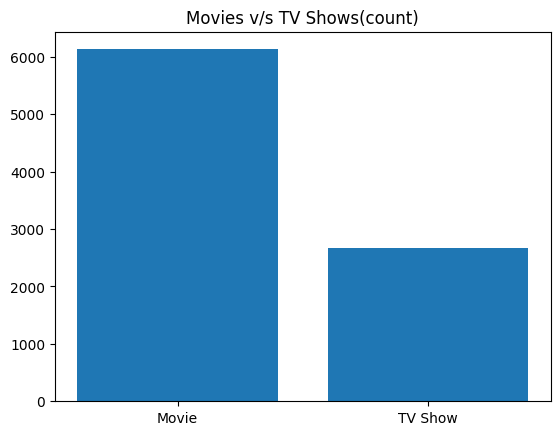

In [76]:
types = df.groupby("type")["show_id"].count()
# print(types)

import matplotlib.pyplot as plt
plt.bar(types.index, types.values)
plt.title("Movies v/s TV Shows(count)")
plt.show()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: show_id, dtype: int64


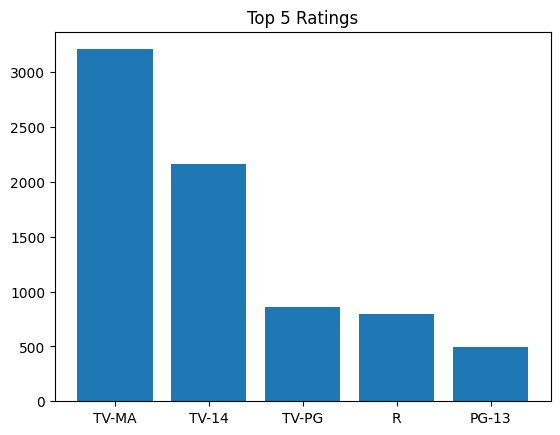

In [153]:
rating = df.groupby("rating")["show_id"].count()
# print(rating)

rating_desc = rating.sort_values(ascending=False)
print(rating_desc)

top_5_rating = rating_desc[:5] #or can use rating_desc.head(5)
# print(top_5_rating)


import matplotlib.pyplot as plt
plt.bar(top_5_rating.index, top_5_rating.values)
plt.title("Top 5 Ratings")
plt.show()

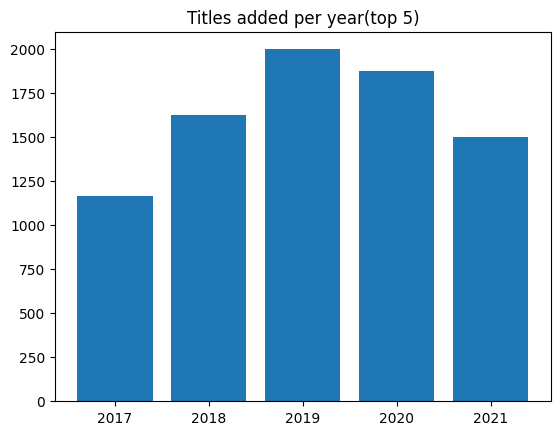

In [155]:
df["year_added"] = pd.to_datetime(df["date_added"], errors="coerce").dt.year
# print(df["year_added"])

titles_per_year = df.groupby("year_added")["show_id"].count()
# print(titles_per_year)

title_per_year_desc = titles_per_year.sort_values(ascending=False)
# print(title_per_year_desc)

top_5_year_of_titles_additon = title_per_year_desc.head(5)
# print(top_5_year_of_titles_additon)

plt.bar(top_5_year_of_titles_additon.index, top_5_year_of_titles_additon.values)
plt.title("Titles added per year(top 5)")
plt.show()

In [6]:
df = df.dropna(subset=['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'])

In [7]:
df.to_csv('model.csv', columns=['type', 'rating', 'release_year'], index=False)

In [8]:
df = pd.read_csv('model.csv')

In [10]:
df.type = df['type'].replace({'Movie' : 0,
                              'TV Show' : 1})

In [12]:
df.rating = df['rating'].replace({'TV-MA' : 0, 'TV-14' : 1, 'R' : 2, 'TV-PG' : 3, 'PG-13' : 4, 'PG' : 5, 'TV-Y7' : 6, 'TV-Y' : 7,
                                'TV-G' : 8, 'NR' : 9, 'G' : 10, 'TV-Y7-FV' : 11, 'NC-17' : 12, 'UR' : 13})

In [13]:
df.rating.unique()

array([ 0,  1,  4,  6,  5,  2,  3,  7,  8, 10, 12,  9, 11, 13])

In [15]:
df.dtypes

type            int64
rating          int64
release_year    int64
dtype: object

In [19]:
from sklearn.model_selection import train_test_split

X = df[['rating', 'release_year']]
Y = df['type']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.7126200274348422

In [25]:
confusion = confusion_matrix(Y_test, Y_pred)
confusion

array([[1039,    0],
       [ 419,    0]])

In [28]:
classification = classification_report(Y_test, Y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1039
           1       0.00      0.00      0.00       419

    accuracy                           0.71      1458
   macro avg       0.36      0.50      0.42      1458
weighted avg       0.51      0.71      0.59      1458



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag